참고문헌

*   Growth monitoring of greenhouse lettuce based
on a convolutional neural network
[Data Availability]( https://figshare.com/s/4e27e3ba666d32daf5c5)

*   Estimation of Greenhouse Lettuce Growth Indices Based on a
Two-Stage CNN Using RGB-D Images
[Data Availability](https://data.4tu.nl/articles/dataset/3rd_Autonomous_Greenhouse_Challenge_Online_Challenge_Lettuce_Images/15023088/1)

In [ ]:
!mkdir -p train/data
%cd /content/train/data
!wget https://data.4tu.nl/ndownloader/files/28906503 -O OnlineChallenge.zip
!unzip OnlineChallenge.zip

/content/train/data
--2023-02-02 02:19:45--  https://data.4tu.nl/ndownloader/files/28906503
Resolving data.4tu.nl (data.4tu.nl)... 131.180.141.15
Connecting to data.4tu.nl (data.4tu.nl)|131.180.141.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘OnlineChallenge.zip’

OnlineChallenge.zip     [               <=>  ] 844.83M  12.3MB/s    in 59s     

2023-02-02 02:20:44 (14.4 MB/s) - ‘OnlineChallenge.zip’ saved [885864530]

Archive:  OnlineChallenge.zip
  inflating: DepthImages/Depth_1.png  
  inflating: DepthImages/Depth_10.png  
  inflating: DepthImages/Depth_100.png  
  inflating: DepthImages/Depth_101.png  
  inflating: DepthImages/Depth_102.png  
  inflating: DepthImages/Depth_103.png  
  inflating: DepthImages/Depth_104.png  
  inflating: DepthImages/Depth_105.png  
  inflating: DepthImages/Depth_106.png  
  inflating: DepthImages/Depth_107.png  
  inflating: DepthImages/Depth_108.png  
  inflating: DepthImages/De

In [ ]:
!pwd
%cd /content

/content/train/data
/content


In [ ]:
!ls -lia /content/train/data

total 865160
4456543 drwxr-xr-x 5 root root      4096 Feb  2 02:20 .
4456542 drwxr-xr-x 3 root root      4096 Feb  2 02:19 ..
4456549 drwxr-xr-x 2 root root     20480 Feb  2 02:20 DepthImages
4456938 drwxr-xr-x 2 root root      4096 Feb  2 02:20 GroundTruth
4456548 -rw-r--r-- 1 root root 885864530 Feb  2 02:20 OnlineChallenge.zip
4456940 -rw-r--r-- 1 root root      4492 Jul 20  2021 ReadMe.txt
4456941 drwxr-xr-x 2 root root     12288 Feb  2 02:21 RGBImages


In [ ]:
import os
data_dir = '/content/train/data'
depth_dir = os.path.join(data_dir, 'DepthImages')
gt_dir = os.path.join(data_dir, 'GroundTruth')
rgb_dir = os.path.join(data_dir, 'RGBImages')

print(os.listdir(rgb_dir))
print(len(os.listdir(depth_dir)))
print(len(os.listdir(gt_dir)))
print(len(os.listdir(rgb_dir)))

['RGB_215.png', 'RGB_207.png', 'RGB_73.png', 'RGB_21.png', 'RGB_87.png', 'RGB_295.png', 'RGB_110.png', 'RGB_23.png', 'RGB_353.png', 'RGB_255.png', 'RGB_354.png', 'RGB_198.png', 'RGB_311.png', 'RGB_85.png', 'RGB_115.png', 'RGB_361.png', 'RGB_188.png', 'RGB_269.png', 'RGB_51.png', 'RGB_195.png', 'RGB_88.png', 'RGB_116.png', 'RGB_205.png', 'RGB_349.png', 'RGB_367.png', 'RGB_26.png', 'RGB_245.png', 'RGB_74.png', 'RGB_387.png', 'RGB_65.png', 'RGB_276.png', 'RGB_186.png', 'RGB_265.png', 'RGB_254.png', 'RGB_11.png', 'RGB_10.png', 'RGB_208.png', 'RGB_258.png', 'RGB_79.png', 'RGB_270.png', 'RGB_129.png', 'RGB_53.png', 'RGB_54.png', 'RGB_67.png', 'RGB_217.png', 'RGB_268.png', 'RGB_221.png', 'RGB_154.png', 'RGB_305.png', 'RGB_173.png', 'RGB_282.png', 'RGB_166.png', 'RGB_222.png', 'RGB_327.png', 'RGB_378.png', 'RGB_128.png', 'RGB_206.png', 'RGB_114.png', 'RGB_68.png', 'RGB_232.png', 'RGB_71.png', 'RGB_199.png', 'RGB_272.png', 'RGB_319.png', 'RGB_7.png', 'RGB_342.png', 'RGB_238.png', 'RGB_72.png', 

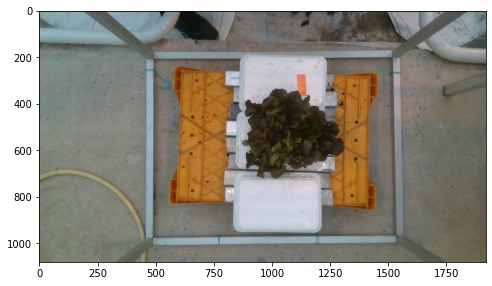

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread(os.path.join(rgb_dir, os.listdir(rgb_dir)[0]))
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(rgb_img)
plt.show()

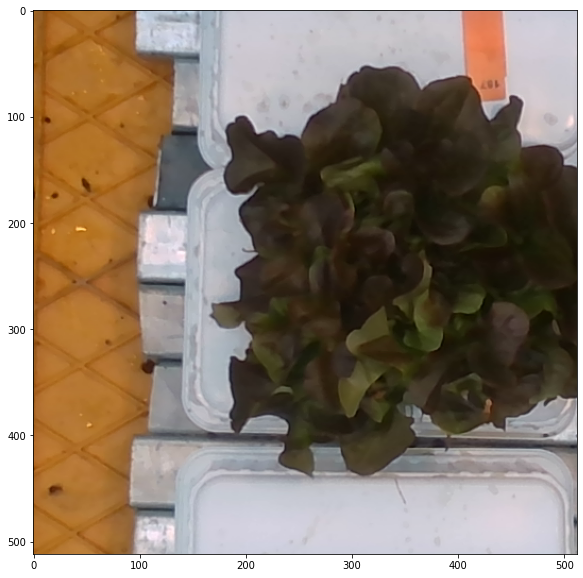

In [ ]:
def center_crop(img, set_size):
  h, w, c = img.shape

  if set_size > min(h, w):
    return img

  crop_width = set_size
  crop_height = set_size

  mid_x, mid_y = w//2, h//2
  offset_x, offset_y = crop_width//2, crop_height//2

  crop_img = img[mid_y-offset_y:mid_y+offset_y, mid_x-offset_x:mid_x+offset_x]
  return crop_img

crop_img = center_crop(rgb_img, 512)


plt.figure(figsize=(10,10))
plt.imshow(crop_img)
plt.show()

In [ ]:
print(type(rgb_img))
print(rgb_img.shape)
rgb_img[:, :, 0]

<class 'numpy.ndarray'>
(1080, 1920, 3)


array([[139, 138, 139, ..., 112, 112, 112],
       [138, 138, 138, ..., 112, 112, 113],
       [138, 137, 138, ..., 111, 111, 111],
       ...,
       [119, 119, 119, ..., 104, 104, 104],
       [119, 119, 120, ..., 104, 104, 104],
       [119, 119, 120, ..., 102, 104, 104]], dtype=uint8)

In [ ]:
!cat /content/train/data/GroundTruth/GroundTruth_All_388_Images.json

{
	"General" : {
		"ExperimentInfo" : "This dataset contains references to images and measured data on a lettuce crop growing in well controlled greenhouse conditions. There are 4 varieties and samples of the crop are destructively measured in a 7 days interval.",
		"Varieties" : "Aphylion, Salanova, Satine, Lugano",
		"Measurements" : {
			"RGBImage" : {
				"Info" : "Reference to a png-file with the rgb-image data",
				"Unit" : "-"
			},
			"DebthInformation" : {
				"Info" : "Reference to a file (with png-extension) that holds xyz-information for each pixel from the top view",
				"Unit" : "-"
			},
			"FreshWeightShoot" : {
				"Info" : "A head of lettuce, harvested from a hydroponic cultivation system has two parts, the 'root' and the 'shoot' The 'shoot' is the top part, being the edable part of the plant, starting at the attachment point of the first leaves",
				"Unit" : "gram/plant"
			},
			"Height" : {
				"Info" : "The height of the highest part of the plant, measured from 

In [ ]:
!cat /content/train/data/ReadMe.txt

Parameter Description
The dataset was generated for the needs of the 3rd International Autonomous Greenhouse Challenge in the experimental facilities of the Greenhouse Horticulture Business Unit in Bleiswijk, 
The Netherlands in 2021. Information regarding the competition can be found here http://www.autonomousgreenhouses.com/.

The dataset contains following folders:
Ground Truth: includes [json] with all GT information
Depth Images: folder with 388  depth images of 16 bit in [png] format 
RGB Images: folder with 388 RGB images of 3x8 bit in [png] format

This dataset contains references to images and measured data on a lettuce crop growing in well controlled greenhouse conditions. There are 4 different lettuce varieties and samples of
the crop are destructively measured in a 7 days interval. 
The lettuce crop varieties are, "Aphylion”, “Salanova”, “Satine” and “Lugano". 
The lettuce plants were grown under different lighting treatments to evaluate the effect of lower and higher light

Imports

In [ ]:
# Imports
import torch
import torch.nn as nn  # All neural network modules; nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all optimizaion algorithms; SGD, Adam, etc.
import torch.nn.functional as F  # All functions that don't have any parameters
from torch.utils.data import DataLoader  # Gives easier dataset management and creates mini batches
import torchvision.datasets as datasets  # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
from torch.utils.data import Dataset
!pip install scikit-image
from skimage import io
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Set device

In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

Hyperparameters

In [ ]:
# Hyperparameters
in_channels = 3
num_output = 3
learning_rate = 0.0001
batch_size = 64
num_epochs = 10
load_model = False

In [ ]:
# model = torchvision.models.resnet50(pretrained=True)
# print(model)

In [ ]:
# Load pretrained model & modify it

# class Identity(nn.Module):
#   def __init__(self):
#     super(Identity, self).__init__()

#   def forward(self, x):
#     return x

# model = torchvision.models.resnet50(pretrained=True)

# for param in model.parameters():
#   param.requires_grad = False

# model.avgpool = Identity()
# model.fc = nn.Sequential(nn.Linear(524288, 2048),
#                          nn.ReLU(),
#                          nn.Linear(2048, 512),
#                          nn.ReLU(),
#                          nn.Linear(512, num_output))
# model.to(device=device)
# print(model)

Model

In [ ]:
# CNN
class CNN(nn.Module):
  def __init__(self, in_channels=3, num_outputs=5):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=(5,5), stride=1, padding=0)  
    self.pool = nn.AvgPool2d(kernel_size=(2,2), stride=2)
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(5,5), stride=1, padding=0)
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), stride=1, padding=1)
    self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5,5), stride=1, padding=1)
    self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(5,5), stride=1, padding=1)
    self.conv6 = nn.Conv2d(in_channels=128, out_channels=216, kernel_size=(5,5), stride=1, padding=0)
    self.conv7 = nn.Conv2d(in_channels=216, out_channels=512, kernel_size=(5,5), stride=1, padding=0)
    self.fc1 = nn.Linear(512, num_outputs)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = F.relu(self.conv3(x))
    x = self.pool(x)
    x = F.relu(self.conv4(x))
    x = self.pool(x)
    x = F.relu(self.conv5(x))
    x = self.pool(x)
    x = F.relu(self.conv6(x))
    x = self.pool(x)
    x = F.relu(self.conv7(x))
    x = x.reshape(x.shape[0], -1)
    x = self.fc1(x)
    
    return x

model = CNN()
model.to(device=device)

RuntimeError: ignored

In [ ]:
def save_checkpoint(state, filename='my_checkpoint.pth.tar'):
  print('=> Saving checkpoint')
  torch.save(state, filename)

def load_checkpoint(checkpoint):
  print('=> Loading checkpoint')
  model.load_state_dict(checkpoint['state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer'])

Load Data

In [ ]:
file = open('/content/train/data/GroundTruth/GroundTruth_All_388_Images.json')
ann_data = json.load(file)

# for i, value in enumerate(ann_data['Measurements'].values()):
#   print(i, value)

list_val = [value for value in ann_data['Measurements'].values()]
print(list_val)
print(len(list_val))
print(list_val[0])

In [ ]:
list_rgb_ann = [rgb['RGB_Image'] for rgb in list_val]
# print(list_rgb_ann)
list_rgb_dir = os.listdir(rgb_dir)

# /content/train/data/RGBImages에 존재하지만, GroundTruth 파일에는 존재하지 않음
for file in list_rgb_dir:
  if file in list_rgb_ann:
    pass
  else:
    print(file)  # RGB_322.png

# /content/train/data/RGBImages에 없지만, GroundTruth 파일에는 존재
for ann in list_rgb_ann:
  if ann in list_rgb_dir:
    pass
  else:
    print(ann)  # RGB_332.png

# /content/train/data/RGBImages/RGB_322.png -> RGB_332.png

In [ ]:
# custom Datasets
class CustomDataset(Dataset):
  def __init__(self, file, root_dir, transform=None):  # download, read data
    ann_file = open(file)
    ann_data = json.load(ann_file)['Measurements']
    self.annotations = [value for value in ann_data.values()]
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):  # return the data length
    return len(self.annotations)

  def __getitem__(self, index):  # return one item on the index
    img_path = os.path.join(os.path.join(self.root_dir, 'RGBImages'), self.annotations[index]['RGB_Image'])
    image = io.imread(img_path)
    fw, dw, h, d, la = self.annotations[index]['FreshWeightShoot'], self.annotations[index]['DryWeightShoot'], self.annotations[index]['Height'], self.annotations[index]['Diameter'], self.annotations[index]['LeafArea']
    y_label = torch.tensor([fw, dw, la])

    if self.transform:
      image = self.transform(image)

    return (image, y_label)

In [ ]:
# Load data
my_transforms = transforms.Compose([transforms.ToPILImage(),
                                    # transforms.Resize((256, 256)),
                                    transforms.CenterCrop((512,512)),
                                    # transforms.ColorJitter(brightness=0.5),
                                    # transforms.RandomRotation(degrees=45),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    # transforms.RandomVerticalFlip(p=0.5),
                                    # transforms.RandomGrayscale(p=0.2),
                                    transforms.ToTensor()])
                                    # transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])])

dataset = CustomDataset(file='/content/train/data/GroundTruth/GroundTruth_All_388_Images.json', 
                        root_dir='/content/train/data', transform=my_transforms)
# train_set, test_set = torch.utils.data.random_split(dataset, [20000, 5000])
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

Loss and optimizer

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
if load_model:
  load_checkpoint(torch.load('my_checkpoint.pth.tar'))

Train network

In [ ]:
# Train network
for epoch in range(num_epochs):
  losses = []

  if epoch % 3 == 0:
    checkpoint = {'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict}
    save_checkpoint(checkpoint)

  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to cuda if possible
    data = data.to(device=device)
    targets = targets.to(device=device)
    
    # Maximum-Minimum Normalization(max=255, min=0)
    data /= 255

    # forward
    pred = model(data)
    loss = criterion(pred, targets)
    losses.append(loss.item())

    # backward
    optimizer.zero_grad()
    loss.backward()

    # gradient descent
    optimizer.step()

  mean_loss = sum(losses)/len(losses)
  print(f'Loss at epoch {epoch} was {mean_loss}')
